In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelCD01A')

# Check its architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_30 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

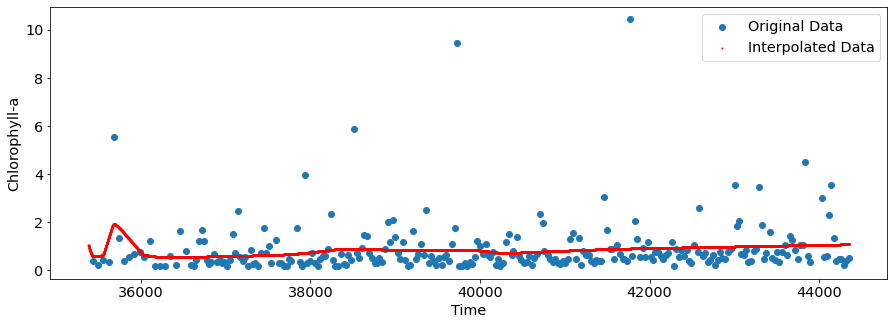

313/313 [==============================] - 0s 333us/step - loss: 9.9240e-18
['loss']


array([[0.04144381],
       [0.0435987 ],
       [0.08170469],
       [0.14704148],
       [0.16656342],
       [0.14676581],
       [0.12255489],
       [0.0992893 ],
       [0.07523502],
       [0.05187467],
       [0.04463973],
       [0.0418184 ],
       [0.03895082],
       [0.03703996],
       [0.03735296],
       [0.03781304],
       [0.03827311],
       [0.03871824],
       [0.0391177 ],
       [0.04676943],
       [0.05106781],
       [0.08672482],
       [0.08691974],
       [0.08712116]], dtype=float32)

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/chloro_data/CD01A.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.16
chlorophylla_max = 10.43
time_min = 35439.00    
time_max = 44357.44      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.003363818
,0.009979327
,0.01681909
,0.023658853
,0.030498616
,0.037338379
,0.044290269
,0.050905778
,0.057745541
,0.064585304
,0.071425067
,0.078264831
,0.085216721
,0.09183223
,0.098671993
,0.105511756
,0.112351519
,0.119191282
,0.126143173
,0.238718946
,0.265853744
,0.951960475
,0.955324293
,0.958800238
])
interpolation